In [1]:
# https://arxiv.org/abs/cond-mat/0703314
# https://arxiv.org/abs/0808.3779

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [3]:
@jit(nopython=True)
def calc_rsks(L):
    rs = np.arange(1,L+1) ## from 1 to L
    ks = np.linspace(np.pi/(L+1.0),L*np.pi/(L+1.0),L)
    return rs,ks

@jit(nopython=True)
def calc_eks(J,ks):
    return -2.0*J*np.cos(ks)

@jit(nopython=True)
def calc_xkrs(L,ks,rs):
    return np.sqrt(2.0/(L+1.0))*np.sin(np.outer(ks,rs))

# #@jit(nopython=True)
# def calc_ys(t,eks,xkrs):
#     expeks = np.exp(1j*t*eks)
#     return np.einsum("ik,k,kj->ij",xkrs,expeks,xkrs)

@jit(nopython=True)
def calc_ys(t,eks,xkrs):
    xc = (1.0+0.0j)*xkrs # for numba
    expeks = np.diag(np.exp(1j*t*eks))
    return xc @ expeks @ xc

@jit(nopython=True)
def calc_fs(ys,initial_state):
    diag = (1.0+0.0j)*np.diag(initial_state)
    return ys @ diag @ ys.T.conjugate()

@jit(nopython=True)
def get_dat(L,L_A,J,ts,period=1):
    rs, ks = calc_rsks(L)
    eks = calc_eks(J,ks)
    xkrs = calc_xkrs(L,ks,rs)
    initial_state = np.array([1.0 if i%period==0 else 0.0 for i in range(L)])
    ee1s = np.zeros(len(ts),dtype=np.float64)
    ee2s = np.zeros(len(ts),dtype=np.float64)
    for i,t in enumerate(ts):
        ys = calc_ys(t,eks,xkrs)
        fs = calc_fs(ys,initial_state)
        eig = np.linalg.eigvalsh(fs[0:L_A,0:L_A])
        peig = 1.0 + eig
        eig[eig<1e-16] = np.finfo(eig.dtype).eps
        peig[peig<1e-16] = np.finfo(peig.dtype).eps
        ee1s[i] = - np.sum(eig*np.log(eig)) + np.sum(peig*np.log(peig))
        ee2s[i] = np.sum(np.log(peig**2-eig**2))
    return ee1s, ee2s

In [4]:
# ## Mott insulator initial

# period = 1
# J = 1.0
# ts = np.linspace(0,1024,1025)
# Ls = np.arange(64,256+1,64)

# ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
# ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
# for i,L in enumerate(Ls):
#     L_A = L//2
#     ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period=period)

# cmap = plt.get_cmap("tab20")
# #plt.xlim(0,2)
# plt.ylim(0,0.6)
# plt.grid()
# for i,L in enumerate(Ls):
#     L_A = L//2
#     plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
#     plt.plot([np.min(ts)/L,np.max(ts)/L],[np.log(3.0)*L_A/L,np.log(3.0)*L_A/L],ls="--",color=cmap(2*i+1))
# plt.show()

In [5]:
# ## CDW 010101... initial

# period = 2
# J = 1.0
# ts = np.linspace(0,1024,1025)
# Ls = np.arange(64,256+1,64)

# ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
# ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
# for i,L in enumerate(Ls):
#     L_A = L//2
#     ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period=period)

# cmap = plt.get_cmap("tab20")
# #plt.xlim(0,2)
# plt.ylim(0,0.4)
# plt.grid()
# for i,L in enumerate(Ls):
#     L_A = L//2
#     plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
# plt.show()

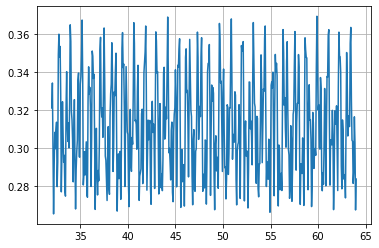

8 2.123916191405887 2.955820857163179
8 0.2654895239257359 0.3694776071453974


In [6]:
## CDW 010101... initial

period = 2
J = 1.0
L = 8
ts = np.linspace(L*32,L*64,L*64+1)
Ls = [L]

ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
for i,L in enumerate(Ls):
    L_A = L//2
    ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period=period)

cmap = plt.get_cmap("tab20")
#plt.xlim(0,2)
#plt.ylim(0,0.4)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
plt.show()

for i,L in enumerate(Ls):
    print(L,np.min(ee2s[i]),np.max(ee2s[i]))
    print(L,np.min(ee2s[i]/L),np.max(ee2s[i]/L))

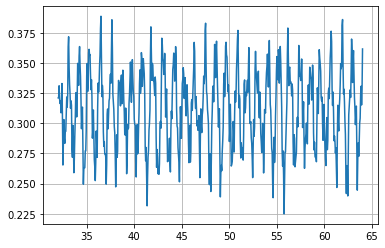

10 2.2481954084696767 3.8880380689362326
10 0.22481954084696767 0.38880380689362326


In [7]:
## CDW 010101... initial

period = 2
J = 1.0
L = 10
ts = np.linspace(L*32,L*64,L*64+1)
Ls = [L]

ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
for i,L in enumerate(Ls):
    L_A = L//2
    ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period=period)

cmap = plt.get_cmap("tab20")
#plt.xlim(0,2)
#plt.ylim(0,0.4)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
plt.show()

for i,L in enumerate(Ls):
    print(L,np.min(ee2s[i]),np.max(ee2s[i]))
    print(L,np.min(ee2s[i]/L),np.max(ee2s[i]/L))

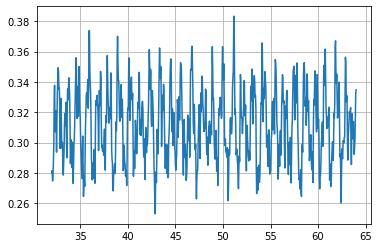

12 3.0364879550777326 4.598997376087272
12 0.25304066292314437 0.383249781340606


In [8]:
## CDW 010101... initial

period = 2
J = 1.0
L = 12
ts = np.linspace(L*32,L*64,L*64+1)
Ls = [L]

ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
for i,L in enumerate(Ls):
    L_A = L//2
    ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period=period)

cmap = plt.get_cmap("tab20")
#plt.xlim(0,2)
#plt.ylim(0,0.4)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
plt.show()

for i,L in enumerate(Ls):
    print(L,np.min(ee2s[i]),np.max(ee2s[i]))
    print(L,np.min(ee2s[i]/L),np.max(ee2s[i]/L))

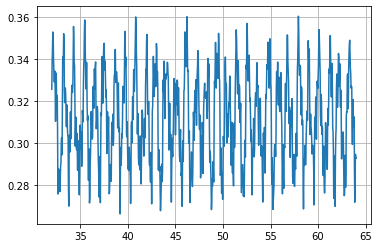

14 3.725044784669711 5.047377950040409
14 0.2660746274764079 0.3605269964314578


In [9]:
## CDW 010101... initial

period = 2
J = 1.0
L = 14
ts = np.linspace(L*32,L*64,L*64+1)
Ls = [L]

ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
for i,L in enumerate(Ls):
    L_A = L//2
    ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period=period)

cmap = plt.get_cmap("tab20")
#plt.xlim(0,2)
#plt.ylim(0,0.4)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
plt.show()

for i,L in enumerate(Ls):
    print(L,np.min(ee2s[i]),np.max(ee2s[i]))
    print(L,np.min(ee2s[i]/L),np.max(ee2s[i]/L))

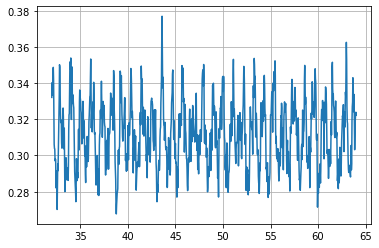

16 4.283095760726195 6.032217453578044
16 0.2676934850453872 0.37701359084862773


In [10]:
## CDW 010101... initial

period = 2
J = 1.0
L = 16
ts = np.linspace(L*32,L*64,L*64+1)
Ls = [L]

ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
for i,L in enumerate(Ls):
    L_A = L//2
    ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period=period)

cmap = plt.get_cmap("tab20")
#plt.xlim(0,2)
#plt.ylim(0,0.4)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
plt.show()

for i,L in enumerate(Ls):
    print(L,np.min(ee2s[i]),np.max(ee2s[i]))
    print(L,np.min(ee2s[i]/L),np.max(ee2s[i]/L))

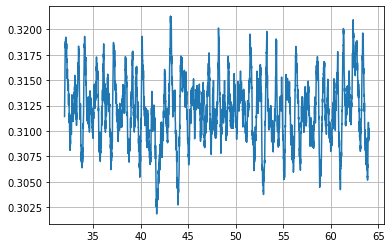

128 38.6364402859282 41.12479958044665
128 0.3018471897338141 0.32128749672223944


In [11]:
## CDW 010101... initial

period = 2
J = 1.0
L = 128
ts = np.linspace(L*32,L*64,L*32+1)
Ls = [L]

ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
for i,L in enumerate(Ls):
    L_A = L//2
    ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period=period)

cmap = plt.get_cmap("tab20")
#plt.xlim(0,2)
#plt.ylim(0,0.4)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
plt.show()

for i,L in enumerate(Ls):
    print(L,np.min(ee2s[i]),np.max(ee2s[i]))
    print(L,np.min(ee2s[i]/L),np.max(ee2s[i]/L))

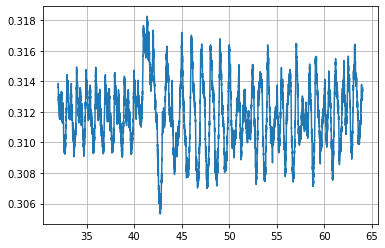

256 78.16343806706932 81.4737991588041
256 0.30532592994948954 0.3182570279640785


In [12]:
## CDW 010101... initial

period = 2
J = 1.0
L = 256
ts = np.linspace(L*32,L*64,L*64+1)
Ls = [L]

ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
for i,L in enumerate(Ls):
    L_A = L//2
    ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period=period)

cmap = plt.get_cmap("tab20")
#plt.xlim(0,2)
#plt.ylim(0,0.4)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
plt.show()

for i,L in enumerate(Ls):
    print(L,np.min(ee2s[i]),np.max(ee2s[i]))
    print(L,np.min(ee2s[i]/L),np.max(ee2s[i]/L))